In [ ]:
import json
import requests
import os
import zipfile
import geopandas as gpd 
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Conjunto de datos Tabasco
df_tabasco=pd.read_csv('/work/Tabasco/conjunto_de_datos_tabasco.csv')
df_tabasco

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,27,Tabasco,0,Total de la entidad Tabasco,0,Total de la entidad,0000,0,2402598,1228927,...,118527,563390,228487,276817,66338,31004,54983,96508,404524,25731
1,27,Tabasco,1,Balancán,0,Total del municipio,0000,0,58524,29282,...,2960,12347,3499,7392,486,227,1907,3607,12387,993
2,27,Tabasco,1,Balancán,1,Total de la localidad urbana,0000,0,13944,7272,...,625,3917,1534,2402,302,133,305,271,2258,75
3,27,Tabasco,1,Balancán,1,Total AGEB urbana,0401,0,1962,1017,...,144,587,244,353,57,15,53,38,330,12
4,27,Tabasco,1,Balancán,1,Balancán,0401,1,54,32,...,9,16,13,13,4,0,*,*,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,18,15,*,...,*,*,*,*,*,*,*,*,*,*
17782,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,19,5,*,...,*,*,*,*,*,*,*,*,*,*
17783,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,20,8,*,...,*,*,*,*,*,*,*,*,*,*
17784,27,Tabasco,17,Tenosique,1,Tenosique de Pino Suárez,0596,21,2,*,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
df_tabasco_limpio=df_tabasco[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','MZA','NOM_LOC','AGEB','POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_tabasco_limpio=df_tabasco_limpio[df_tabasco_limpio.apply(lambda row:all(row != '*'), axis=1)]
series_religiones=df_tabasco_limpio['PCATOLICA'].astype(int)+df_tabasco_limpio['PRO_CRIEVA'].astype(int)+df_tabasco_limpio['POTRAS_REL'].astype(int)
series_14_a_59=df_tabasco_limpio['P_12A14_F'].astype(int)+df_tabasco_limpio['P_15A49_F'].astype(int)
df_tabasco_limpio['P_0A2']=df_tabasco_limpio['P_0A2'].astype(int)+df_tabasco_limpio['P_3A5'].astype(int)
df_tabasco_limpio.insert(13,'Personas c/religion',series_religiones)
df_tabasco_limpio.insert(8,'Mujeres de 12-49',series_14_a_59)
df_tabasco_limpio=df_tabasco_limpio.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5'],axis=1)
df_tabasco_limpio.rename(columns={'PDER_SS':'Personas C/Servicio de Salud','VPH_SINCINT': 'Personas S/Internet','GRAPROES': 'Prom. Grado Escolar','POCUPADA': 'Personas Ocupadas','POBTOT': 'Poblacion Total','P12YM_CASA': 'Personas Casadas','P_0A2': 'Poblacion de 0 a 5','PSIN_RELIG':'Personas s/religion','PROM_HNV':'Promedio de nacidos','GRAP':'Personas Separadas'},inplace =True)
df_tabasco_limpio['Personas Casadas']=df_tabasco_limpio['Personas Casadas'].astype(int)
df_tabasco_limpio['Personas s/religion']=df_tabasco_limpio['Personas s/religion'].astype(int)
df_tabasco_limpio['Personas Ocupadas']=df_tabasco_limpio['Personas Ocupadas'].astype(int)
df_tabasco_limpio['Prom. Grado Escolar']=df_tabasco_limpio['Prom. Grado Escolar'].astype(float)
df_tabasco_limpio['Personas S/Internet']=df_tabasco_limpio['Personas S/Internet'].astype(int)
df_tabasco_limpio['Personas C/Servicio de Salud']=df_tabasco_limpio['Personas C/Servicio de Salud'].astype(int)
df_tabasco_limpio

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,MZA,NOM_LOC,AGEB,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
0,27,Tabasco,0,Total de la entidad Tabasco,0,0,Total de la entidad,0000,716799,2402598,251613,2143721,1054180,254593,1146611,9.69,404524,1645089
1,27,Tabasco,1,Balancán,0,0,Total del municipio,0000,16118,58524,6464,49962,26559,8478,30128,8.27,12387,40355
2,27,Tabasco,1,Balancán,1,0,Total de la localidad urbana,0000,4142,13944,1388,12555,5872,1356,6901,10.37,2258,10212
8,27,Tabasco,1,Balancán,1,5,Balancán,0401,38,110,9,97,46,13,60,11.53,16,80
11,27,Tabasco,1,Balancán,1,8,Balancán,0401,37,120,15,112,46,8,67,8.72,27,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17776,27,Tabasco,17,Tenosique,1,13,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0
17777,27,Tabasco,17,Tenosique,1,14,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0
17779,27,Tabasco,17,Tenosique,1,16,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0
17780,27,Tabasco,17,Tenosique,1,17,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0


In [ ]:
df_tabasco_limpio.query("~NOM_LOC.str.startswith('Total')",inplace=True)

In [ ]:
df_tabasco_limpio

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,MZA,NOM_LOC,AGEB,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
8,27,Tabasco,1,Balancán,1,5,Balancán,0401,38,110,9,97,46,13,60,11.53,16,80
11,27,Tabasco,1,Balancán,1,8,Balancán,0401,37,120,15,112,46,8,67,8.72,27,72
12,27,Tabasco,1,Balancán,1,9,Balancán,0401,24,87,13,76,26,11,40,10.98,18,46
19,27,Tabasco,1,Balancán,1,17,Balancán,0401,24,81,9,77,35,4,27,10.06,18,40
20,27,Tabasco,1,Balancán,1,18,Balancán,0401,15,56,7,51,26,5,27,10.05,14,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17776,27,Tabasco,17,Tenosique,1,13,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0
17777,27,Tabasco,17,Tenosique,1,14,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0
17779,27,Tabasco,17,Tenosique,1,16,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0
17780,27,Tabasco,17,Tenosique,1,17,Tenosique de Pino Suárez,0596,0,0,0,0,0,0,0,0.00,0,0


## Dimension del dataset:

In [ ]:
df_tabasco_limpio.shape

(5282, 18)

## Medidas de dispersión y de tendencia central

In [ ]:
df_tabasco_limpio.describe()

,ENTIDAD,MUN,LOC,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
count,5282.0,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,27.0,6.654866,40.957213,33.703711,43.285687,141.535214,14.473874,126.576486,60.770920,14.678152,66.783983,7.118266,20.482204,97.958538
std,0.0,4.498855,66.904840,101.722586,69.531145,227.344011,24.651346,206.798839,100.132638,27.352437,111.113297,4.904536,39.637094,156.020491
min,27.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.0,4.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.0,4.000000,1.000000,17.000000,30.000000,98.000000,10.000000,87.000000,41.000000,7.000000,44.000000,9.180000,12.000000,66.000000
75%,27.0,10.000000,65.000000,30.000000,56.000000,181.000000,18.000000,160.000000,77.000000,19.000000,85.000000,10.757500,26.000000,126.000000
max,27.0,17.000000,317.000000,800.000000,982.000000,3258.000000,399.000000,3253.000000,1461.000000,638.000000,1808.000000,16.500000,648.000000,2643.000000


In [ ]:
df_tabasco_limpio.mode(numeric_only=True)

,ENTIDAD,MUN,LOC,MZA,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
0,27,4,1,1,0,0,0,0,0,0,0,0.0,0,0


In [ ]:
df_tabasco_limpio.median(numeric_only=True)

ENTIDAD                         27.00
MUN                              4.00
LOC                              1.00
MZA                             17.00
Mujeres de 12-49                30.00
Poblacion Total                 98.00
Poblacion de 0 a 5              10.00
Personas c/religion             87.00
Personas Casadas                41.00
Personas s/religion              7.00
Personas Ocupadas               44.00
Prom. Grado Escolar              9.18
Personas S/Internet             12.00
Personas C/Servicio de Salud    66.00
dtype: float64

### Variables cuantitativas

In [ ]:
df_tabasco_limpio.describe(include=object)

,NOM_ENT,NOM_MUN,NOM_LOC,AGEB
count,5282,5282,5282,5282
unique,1,17,145,529
top,Tabasco,Centro,Villahermosa,0328
freq,5282,1797,1093,42


## Exploración de datos con Matplot y Seaborn

In [ ]:
df_num=df_tabasco_limpio.select_dtypes(exclude=object)
df_cat=df_tabasco_limpio.select_dtypes(include=object)
df_s=df_tabasco_limpio.drop(['ENTIDAD','NOM_ENT','MUN','LOC','NOM_LOC','AGEB'],axis=1)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

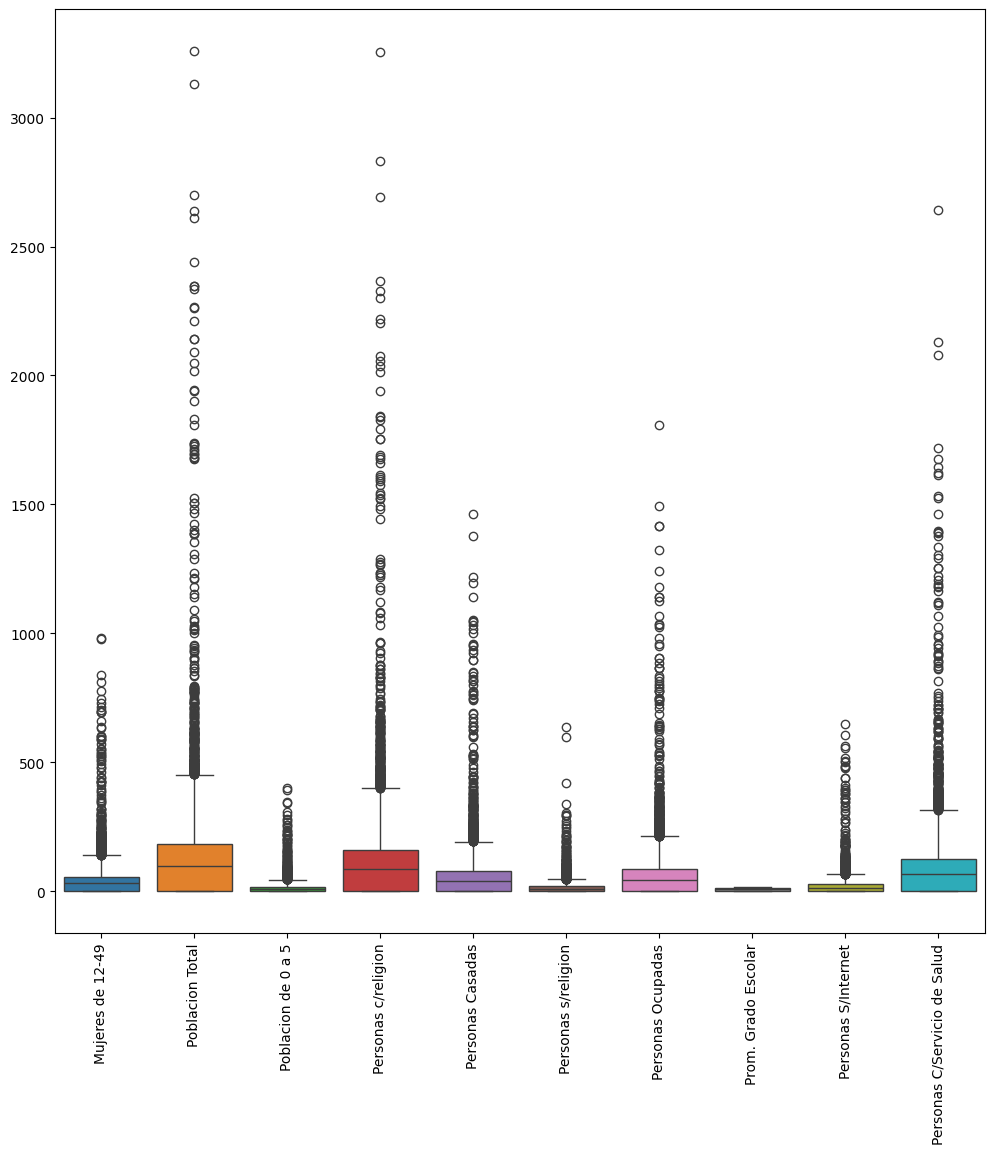

In [ ]:

plt.figure(figsize=(12,12))
sns.boxplot(data=df_num.iloc[:,4:])
plt.xticks(rotation=90)
plt.tight_layout

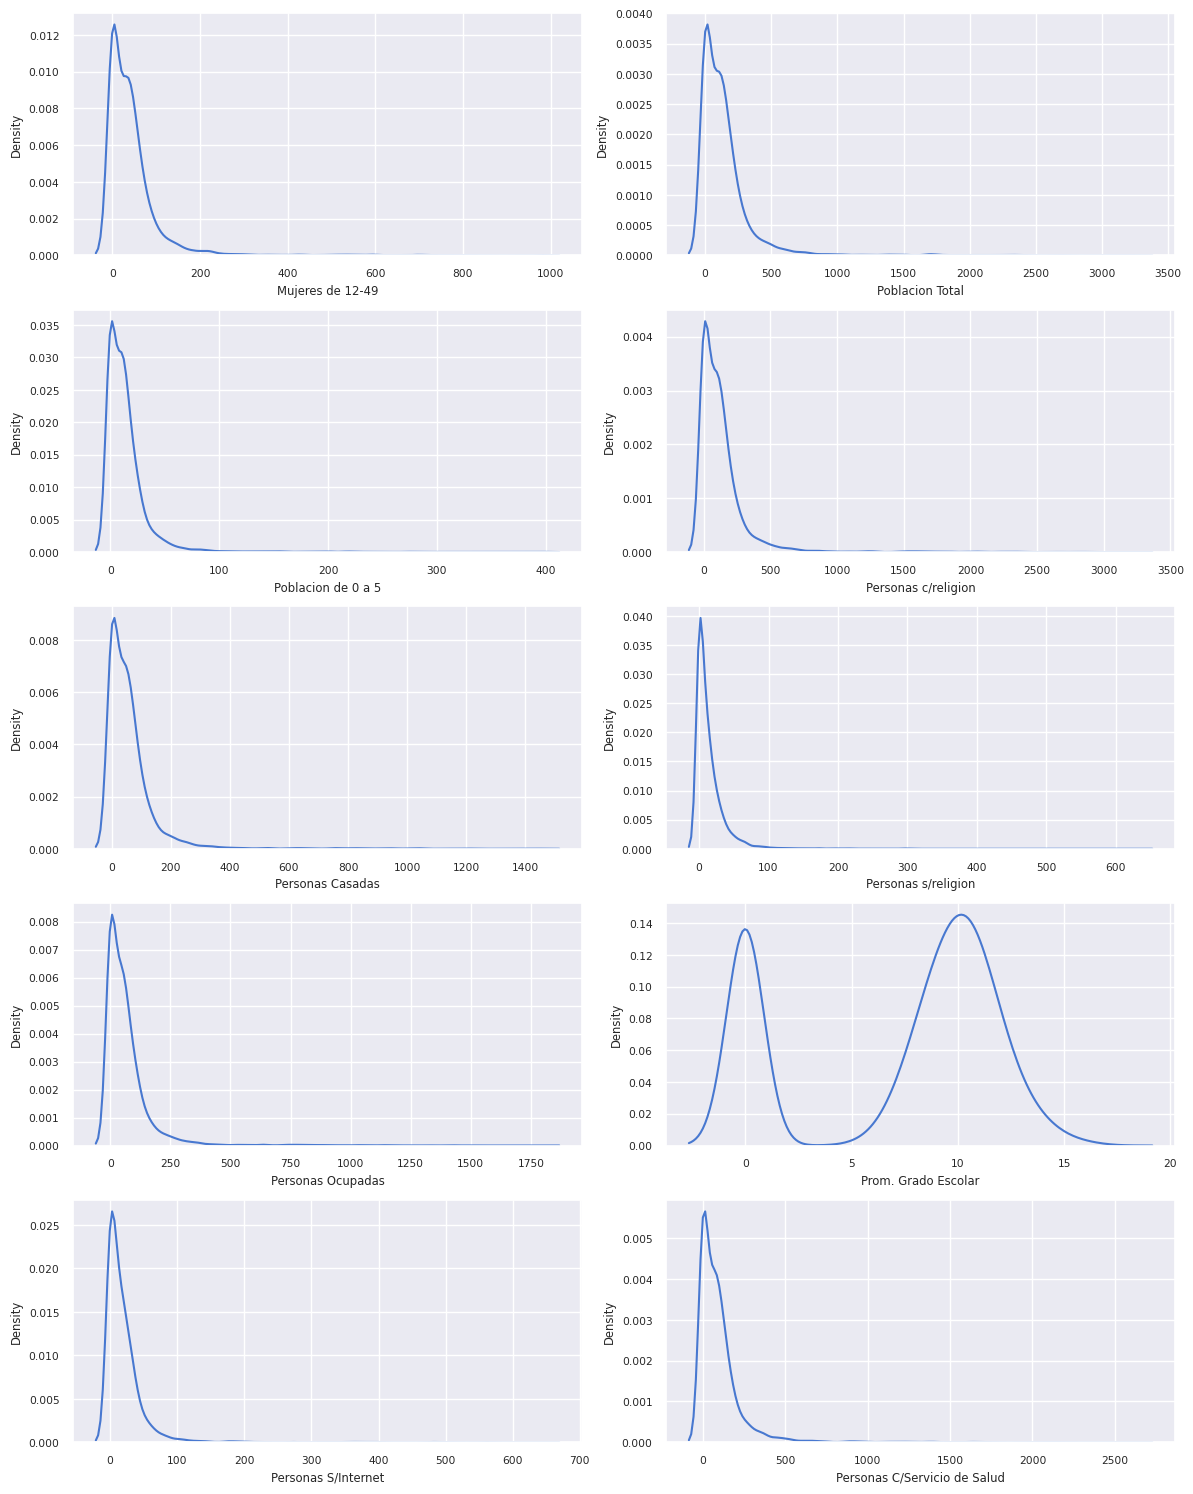

In [ ]:
sns.set(style='darkgrid',palette='muted',font_scale=0.7)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,15))
for i, ax in enumerate(axes.flatten()):
    sns.kdeplot(x= df_num.iloc[:, i+4], ax=ax)
fig.tight_layout()
plt.show()

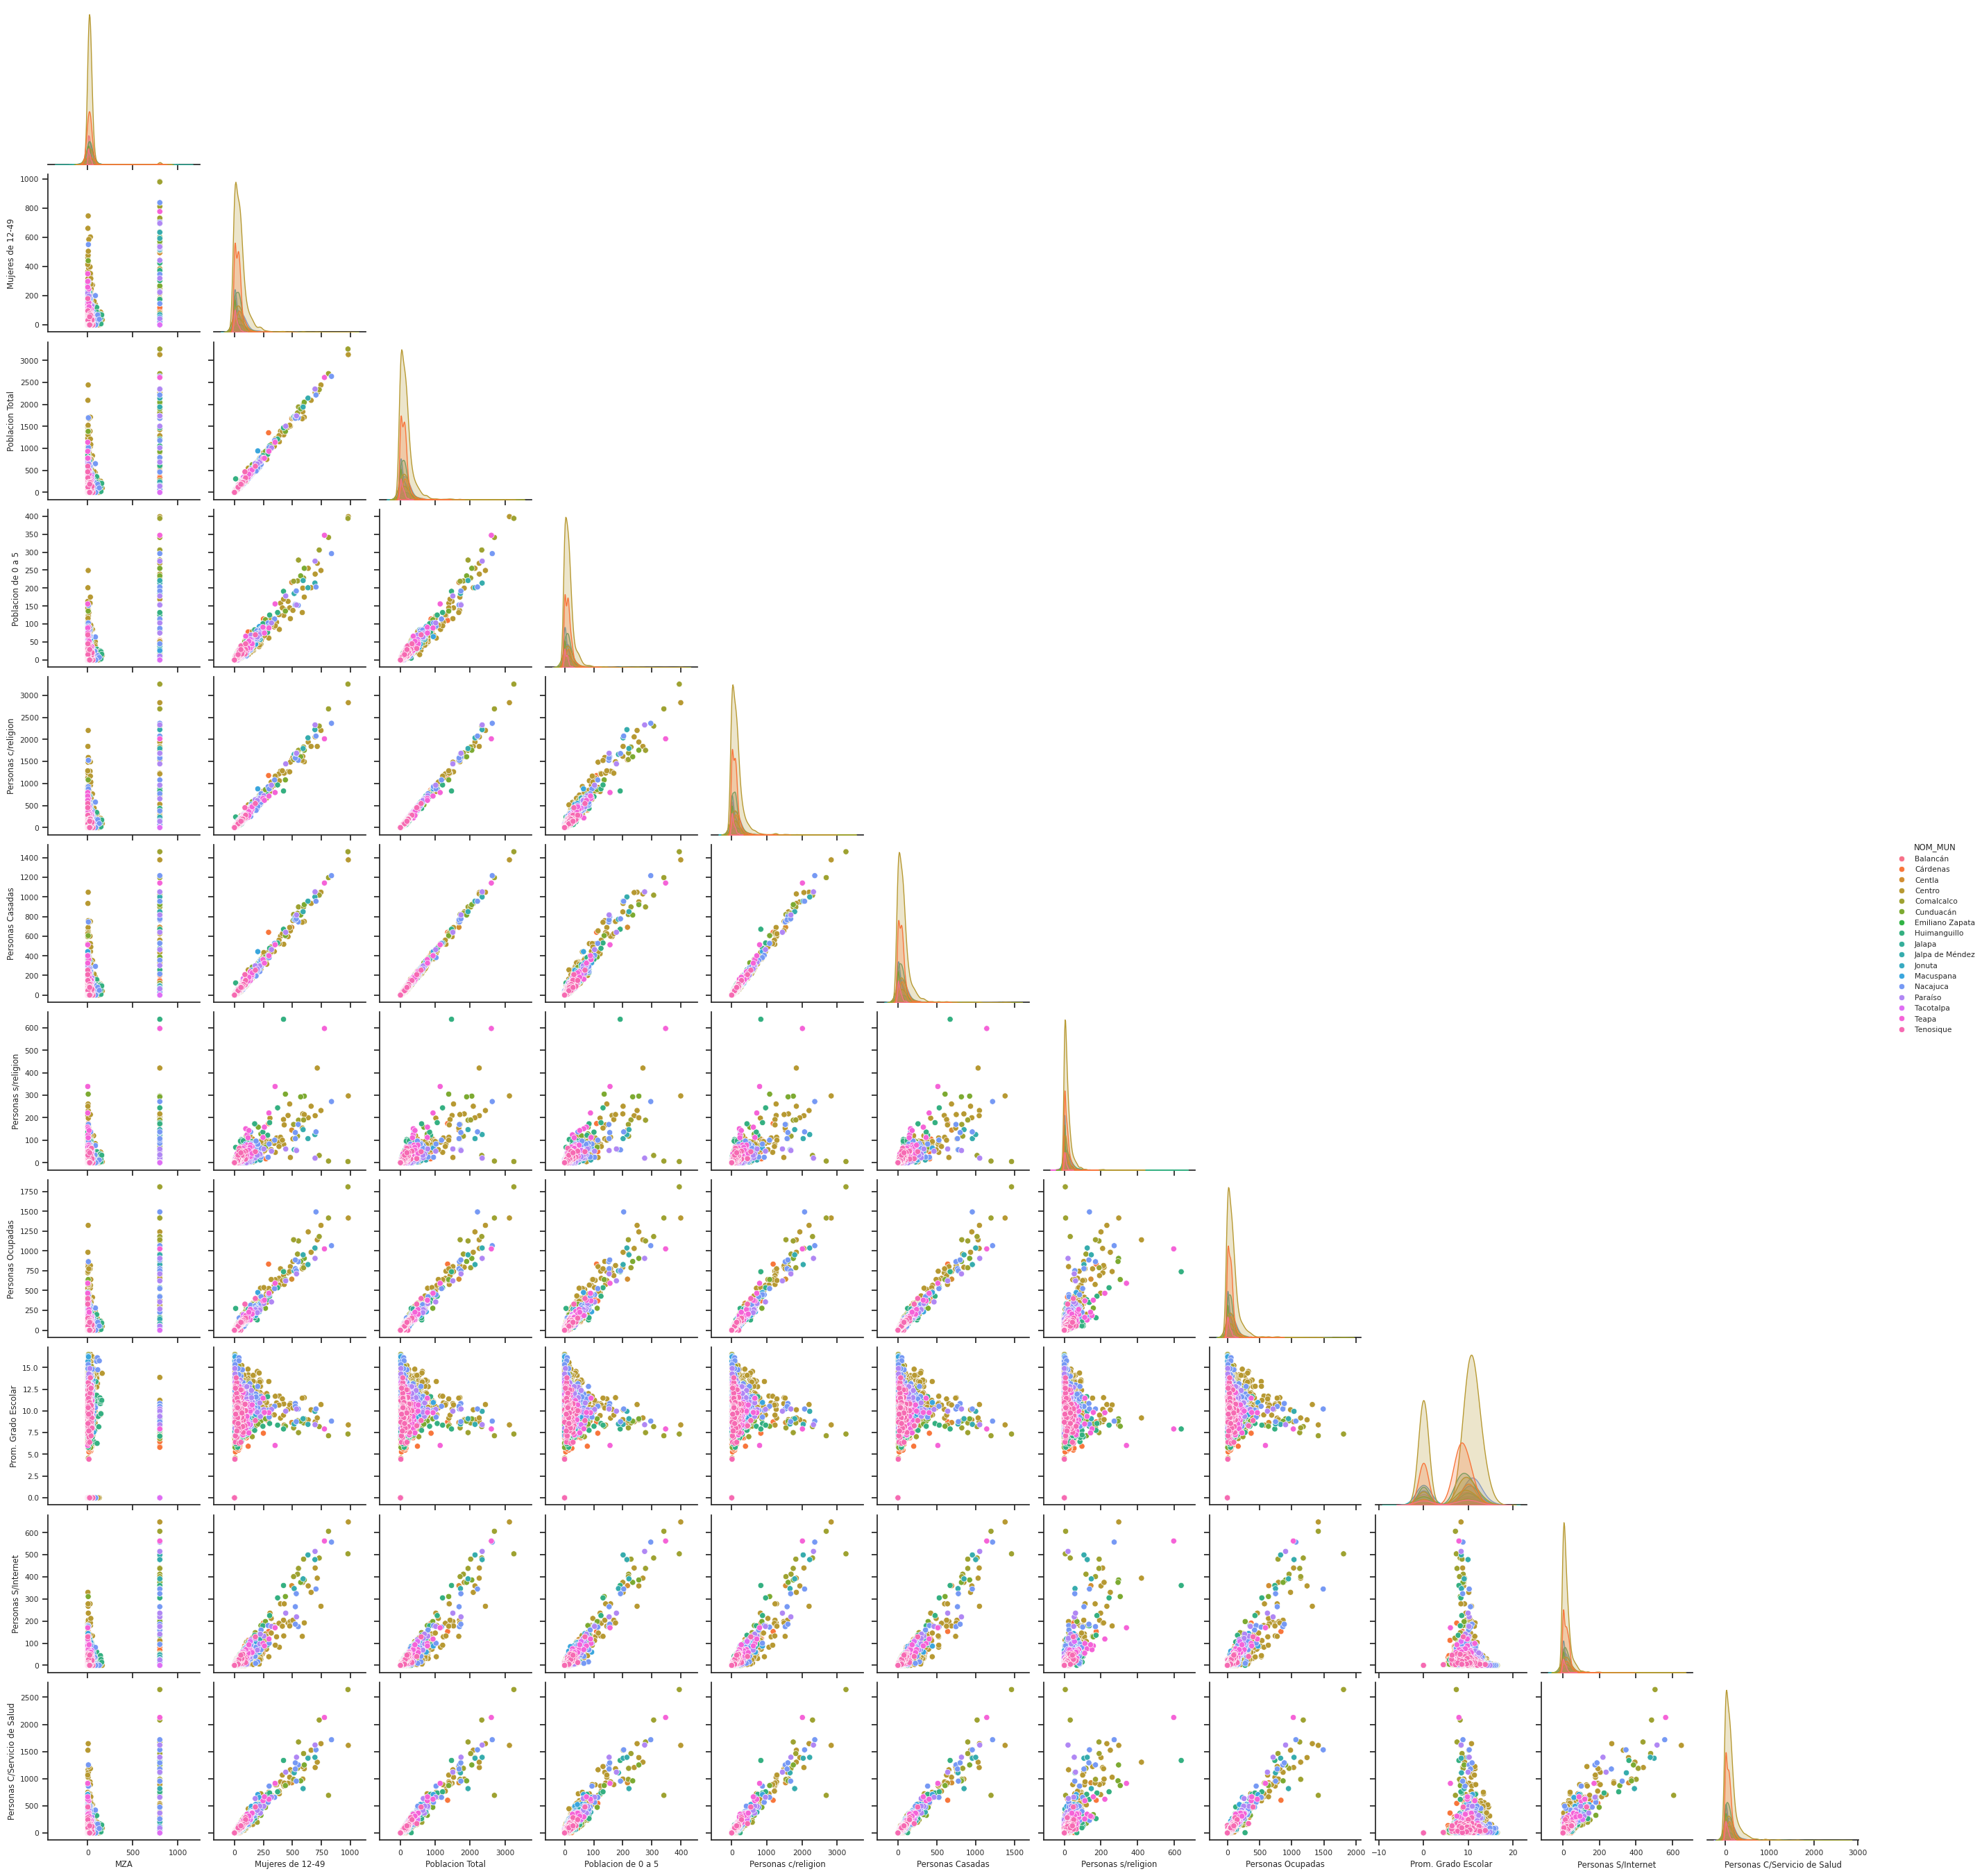

In [ ]:
sns.set_style(style='ticks')
sns.pairplot(data=df_s,corner=True,hue='NOM_MUN',kind='scatter')

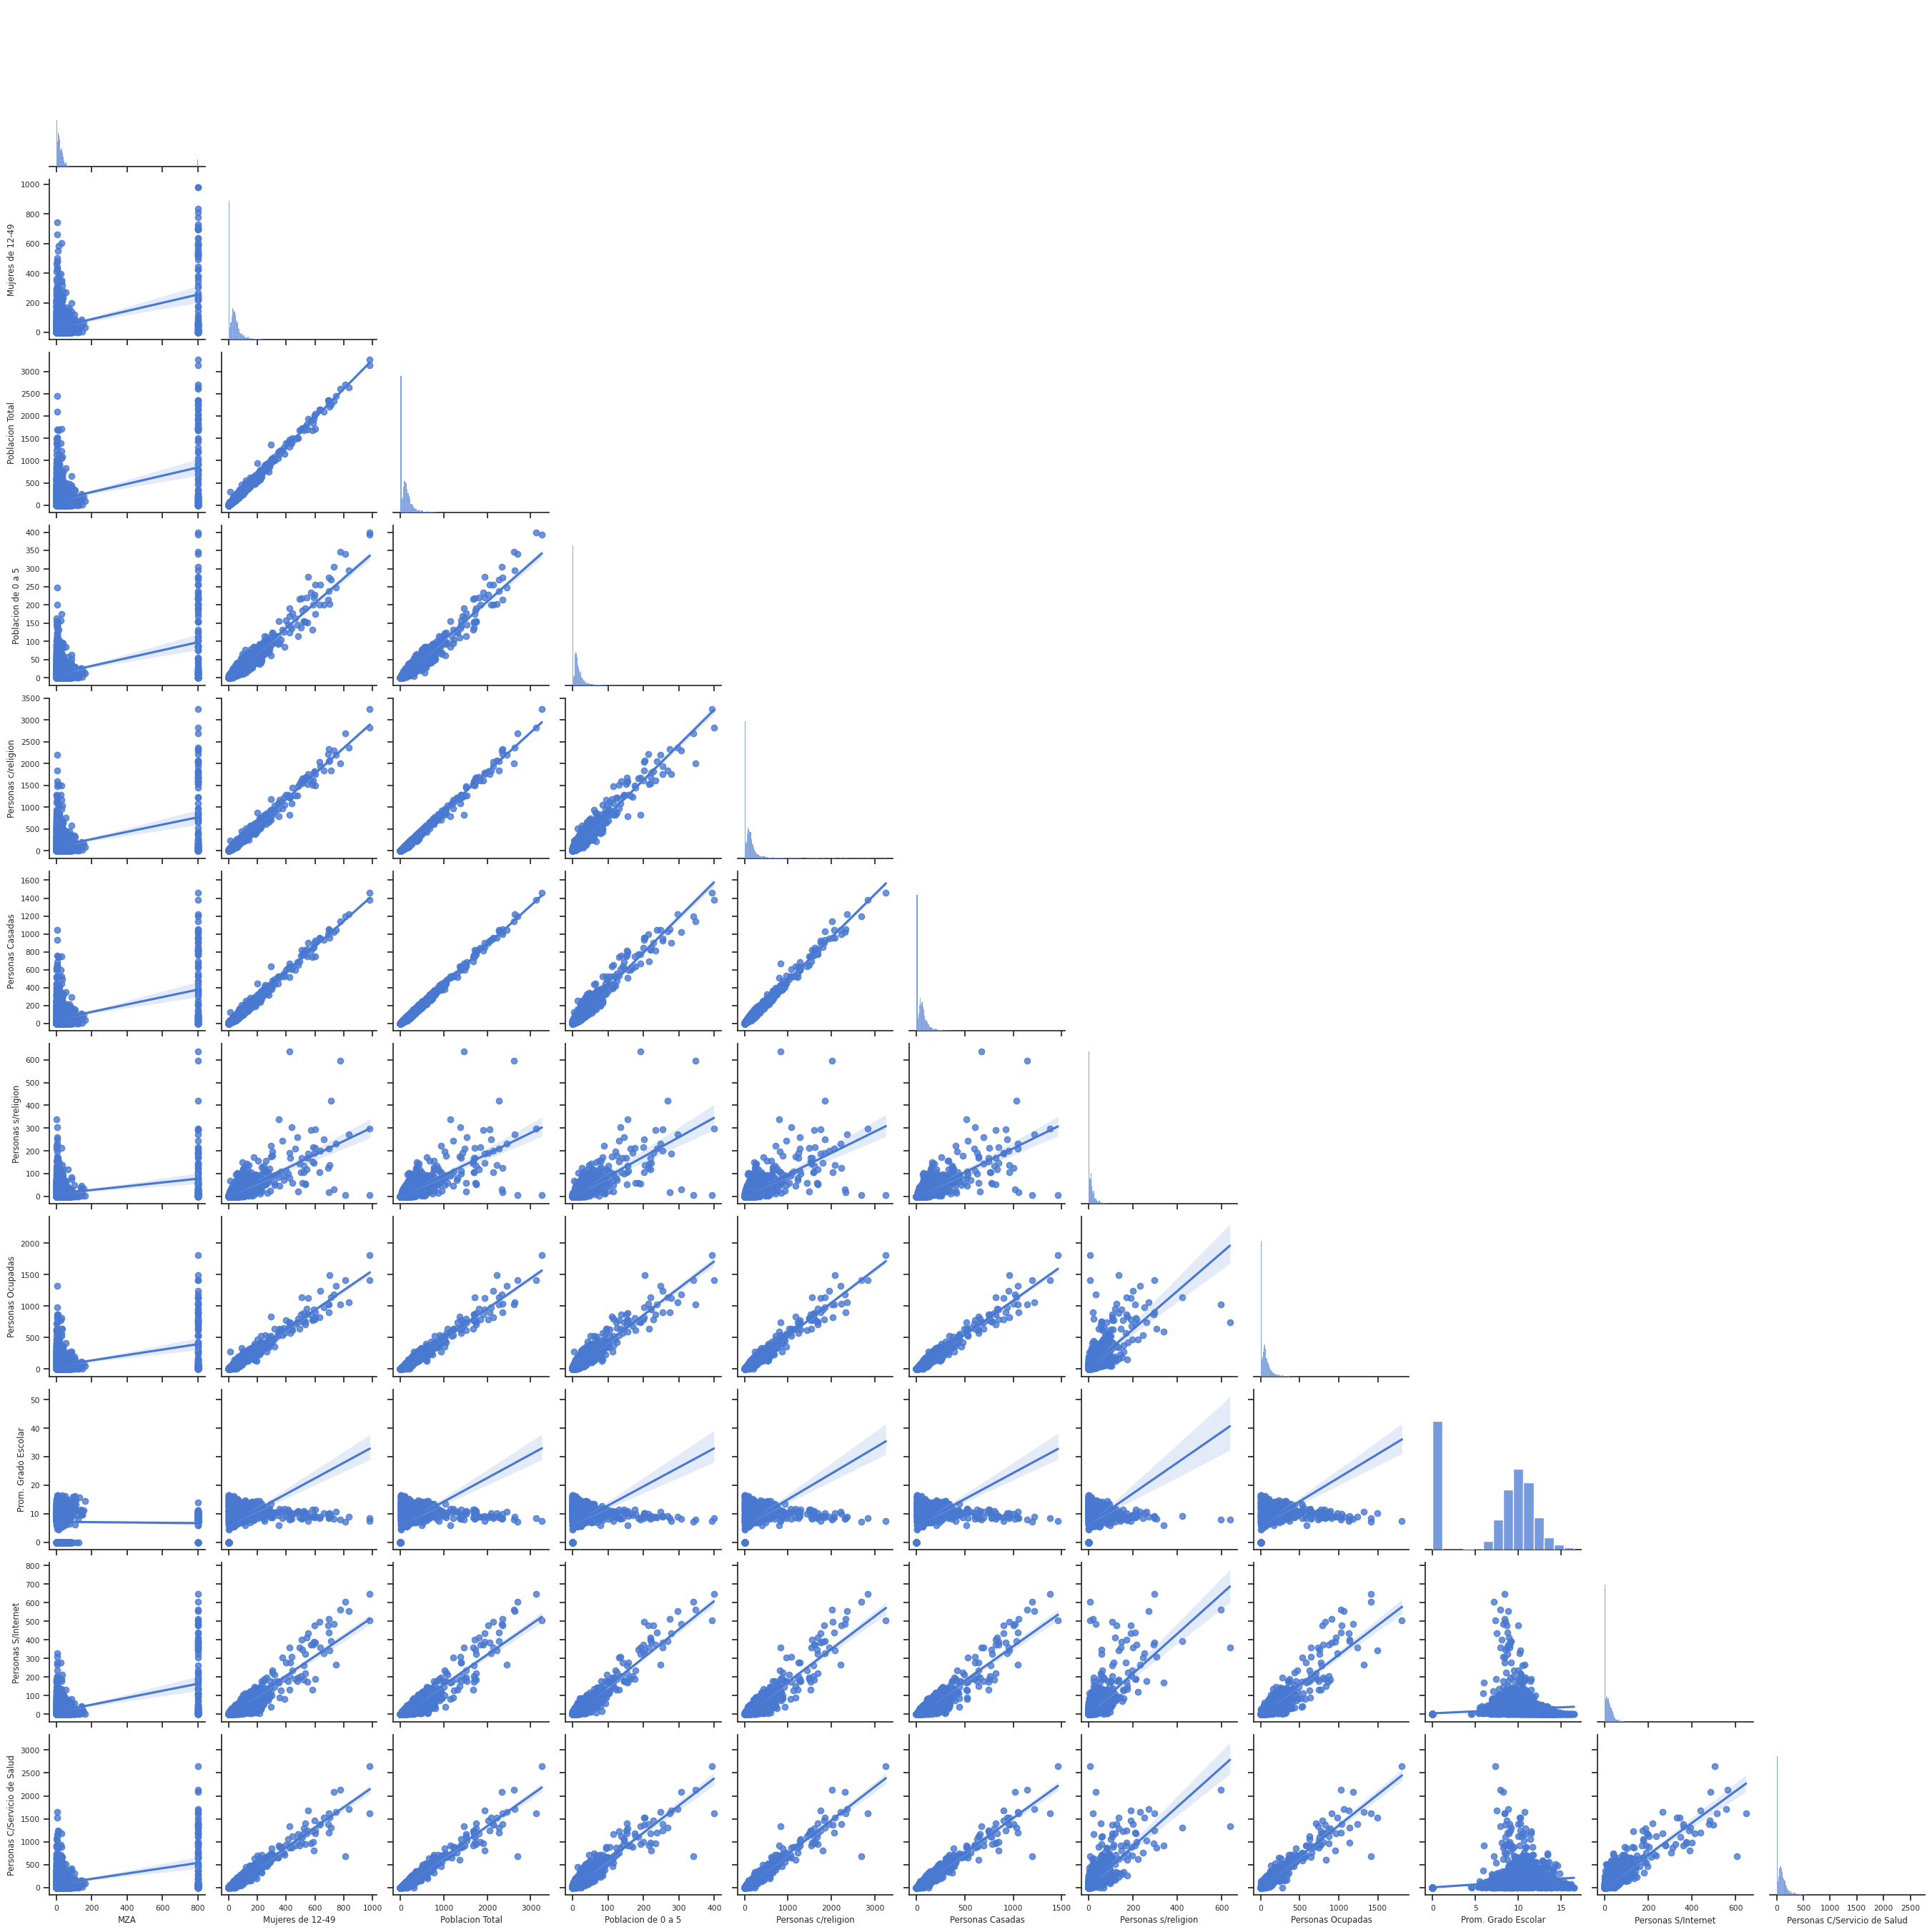

In [ ]:
sns.set_style(style='ticks')
sns.pairplot(data=df_s,corner=True,kind='reg')

In [ ]:
corr=df_num.iloc[:,4:].corr(method='pearson')
corr

,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Prom. Grado Escolar,Personas S/Internet,Personas C/Servicio de Salud
Mujeres de 12-49,1.000000,0.995873,0.965032,0.991972,0.992838,0.767070,0.979220,0.388770,0.919518,0.972746
Poblacion Total,0.995873,1.000000,0.968911,0.996359,0.997149,0.767800,0.983578,0.384391,0.927446,0.975305
Poblacion de 0 a 5,0.965032,0.968911,1.000000,0.961764,0.969255,0.773584,0.946538,0.336884,0.950238,0.935995
Personas c/religion,0.991972,0.996359,0.961764,1.000000,0.993646,0.710772,0.980916,0.381878,0.921043,0.970686
Personas Casadas,0.992838,0.997149,0.969255,0.993646,1.000000,0.765551,0.981451,0.373700,0.929844,0.971701
Personas s/religion,0.767070,0.767800,0.773584,0.710772,0.765551,1.000000,0.747854,0.300523,0.739021,0.756026
Personas Ocupadas,0.979220,0.983578,0.946538,0.980916,0.981451,0.747854,1.000000,0.376986,0.898371,0.960763
Prom. Grado Escolar,0.388770,0.384391,0.336884,0.381878,0.373700,0.300523,0.376986,1.000000,0.265271,0.398380
Personas S/Internet,0.919518,0.927446,0.950238,0.921043,0.929844,0.739021,0.898371,0.265271,1.000000,0.879174
Personas C/Servicio de Salud,0.972746,0.975305,0.935995,0.970686,0.971701,0.756026,0.960763,0.398380,0.879174,1.000000


<AxesSubplot: >

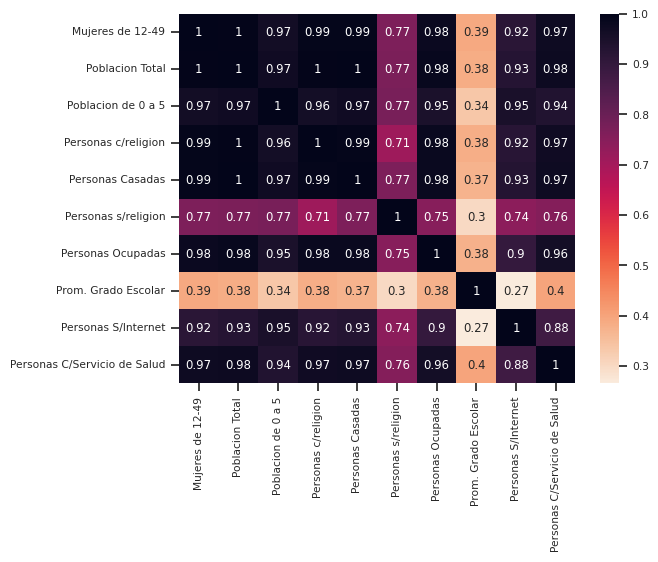

In [ ]:
sns.heatmap(data=corr,annot=True,cmap='rocket_r')

In [ ]:
df_cat

,NOM_ENT,NOM_MUN,NOM_LOC,AGEB
8,Tabasco,Balancán,Balancán,0401
11,Tabasco,Balancán,Balancán,0401
12,Tabasco,Balancán,Balancán,0401
19,Tabasco,Balancán,Balancán,0401
20,Tabasco,Balancán,Balancán,0401
...,...,...,...,...
17776,Tabasco,Tenosique,Tenosique de Pino Suárez,0596
17777,Tabasco,Tenosique,Tenosique de Pino Suárez,0596
17779,Tabasco,Tenosique,Tenosique de Pino Suárez,0596
17780,Tabasco,Tenosique,Tenosique de Pino Suárez,0596


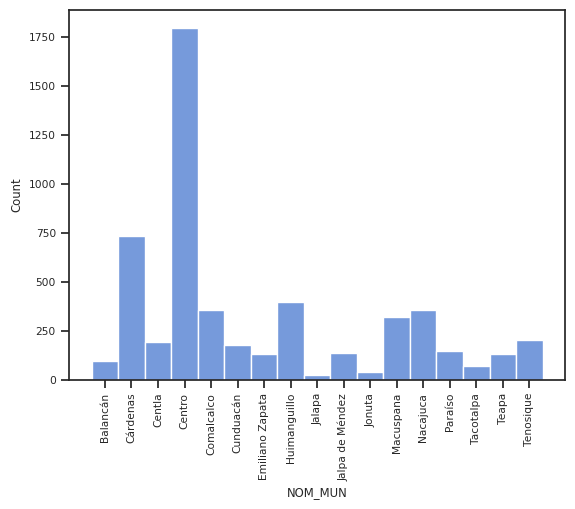

In [ ]:
sns.histplot(data=df_cat,x='NOM_MUN')
plt.tight_layout;
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Proporción de los municipios')

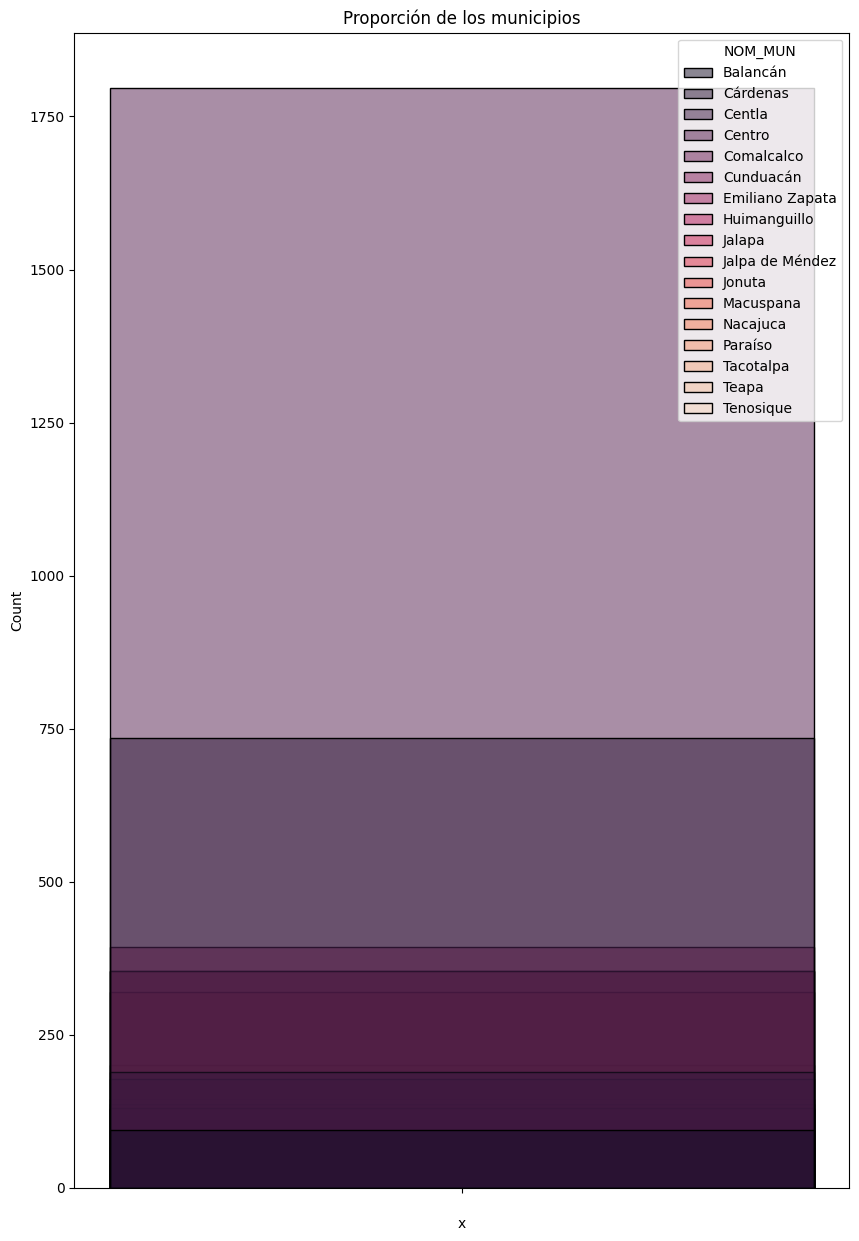

In [ ]:
plt.figure(figsize=(10,15))
df_temp=df_cat.copy()
df_temp['x']=' '
sns.histplot(data=df_temp,x='x',hue='NOM_MUN',palette='rocket')
plt.title('Proporción de los municipios')

In [ ]:
print("Tabla de contingencia para el Nombre de Estado con Población de 0 a 5:")
pd.crosstab(df_cat.iloc[:, 0], df_tabasco_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el Nombre de Estado con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Tabasco,0.328095,0.013631,0.006816,0.004733,0.017986,0.032942,0.039947,0.040326,0.037675,0.041462,...,0.000379,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189


In [ ]:
print("Tabla de contingencia para el Nombre del municipio con Población de 0 a 5:")
pd.crosstab(df_cat.iloc[:, 1], df_tabasco_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el Nombre del municipio con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
NOM_MUN,,,,,,,,,,,,,,,,,,,,,
Balancán,0.007952,0.000189,0.000947,0.000379,0.000379,0.001136,0.001893,0.001136,0.000379,0.000568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Centla,0.006816,0.000000,0.000379,0.000189,0.000379,0.001136,0.000757,0.001704,0.001515,0.001325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Centro,0.108671,0.005680,0.002651,0.001704,0.005301,0.011359,0.011738,0.013821,0.012306,0.014010,...,0.000189,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189
Comalcalco,0.016850,0.000379,0.000379,0.000189,0.000568,0.002651,0.003408,0.004165,0.002461,0.003976,...,0.000000,0.000000,0.000000,0.000189,0.000000,0.000189,0.000189,0.000000,0.000189,0.000000
Cunduacán,0.005490,0.000947,0.000379,0.000189,0.000757,0.000947,0.001515,0.000947,0.001893,0.001515,...,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cárdenas,0.042976,0.001704,0.000568,0.000757,0.002651,0.005112,0.007573,0.006248,0.006626,0.005490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Emiliano Zapata,0.014010,0.000757,0.000000,0.000000,0.001136,0.001136,0.001704,0.000947,0.000757,0.000947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Huimanguillo,0.019879,0.001325,0.000000,0.000568,0.001893,0.002083,0.003786,0.003218,0.003218,0.004544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jalapa,0.002272,0.000189,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print("Tabla de contingencia para el Nombre de la localidad con Población de 0 a 5:")
pd.crosstab(df_cat.iloc[:, 2], df_tabasco_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el Nombre de la localidad con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
NOM_LOC,,,,,,,,,,,,,,,,,,,,,
Acachapan y Colmena 1ra. Sección,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aldama,0.001893,0.000000,0.000000,0.000000,0.000189,0.000189,0.000189,0.000189,0.000189,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anacleto Canabal 1ra. Sección,0.000000,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anacleto Canabal 2da. Sección,0.000000,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anacleto Canabal 3ra. Sección,0.000189,0.000189,0.000000,0.000000,0.000000,0.000568,0.000000,0.000189,0.000568,0.000189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tocoal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0.000000,0.000000,0.000568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vicente Guerrero,0.000379,0.000000,0.000000,0.000000,0.000189,0.000189,0.000000,0.000568,0.000189,0.000568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vicente Guerrero 1ra. Sección,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Tabla de contingencia para el AGEB con Población de 0 a 5:")
pd.crosstab(df_cat.iloc[:, 3], df_tabasco_limpio["Poblacion de 0 a 5"], normalize=True)

Tabla de contingencia para el AGEB con Población de 0 a 5:


Poblacion de 0 a 5,0,3,4,5,6,7,8,9,10,11,...,255,269,275,278,296,306,341,347,394,399
AGEB,,,,,,,,,,,,,,,,,,,,,
0010,0.000757,0.000000,0.0,0.000000,0.000000,0.000000,0.000379,0.000947,0.000000,0.000757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012,0.000757,0.000000,0.0,0.000000,0.000189,0.000189,0.000000,0.000189,0.000379,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0013,0.000568,0.000000,0.0,0.000000,0.000000,0.000189,0.000000,0.000189,0.000000,0.000189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0016,0.000568,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0018,0.000000,0.000000,0.0,0.000189,0.000000,0.000000,0.000189,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2626,0.000189,0.000000,0.0,0.000000,0.000000,0.000189,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2630,0.000000,0.000000,0.0,0.000000,0.000189,0.000000,0.000000,0.000189,0.000189,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelo tabasco

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import multiprocessing

In [ ]:
X=df_num.iloc[:,4:].drop(columns=['Poblacion de 0 a 5','Prom. Grado Escolar'],axis=1)
y=df_num.loc[:,'Poblacion de 0 a 5']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=5,
                                               shuffle=True                   
                                                        )

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=pd.Series(reg.predict(X_test))
y_pred.index=y_test.index
resultados=pd.DataFrame([y_test,y_pred]).T
resultados.columns=['y_test','y_pred']
resultados


,y_test,y_pred
5215,0.0,0.039405
1392,9.0,11.651960
5555,13.0,13.769696
17035,75.0,78.303986
16684,16.0,17.449296
...,...,...
569,37.0,35.807103
14223,14.0,11.563607
16674,0.0,0.039405
3930,0.0,0.039405


In [ ]:
print('MSE:', mean_squared_error(resultados['y_test'],resultados['y_pred']))
print('R^2:', r2_score(resultados['y_test'],resultados['y_pred']))

MSE: 20.906352378322126
R^2: 0.9442215612798888


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0848c89-aa3f-4842-a14c-1735a6491904' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>